In [1]:
import pandas as pd

In [34]:
df = pd.DataFrame({
    'student_id': [1,2,3,4,5,6,7],
    'country': ['China', 'USA', 'UK', 'Japan', 'Korea', 'China', 'USA'],
    'education': ['Master', 'Bachelor', 'Bachelor', 'Master', 'PHD', 'PHD', 'Bachelor'],
    'target': [1, 0, 1, 0, 1, 0, 1]
})
df.head(10)

,student_id,country,education,target
0,1,China,Master,1
1,2,USA,Bachelor,0
2,3,UK,Bachelor,1
3,4,Japan,Master,0
4,5,Korea,PHD,1
5,6,China,PHD,0
6,7,USA,Bachelor,1


# 特征编码

## Onehot

In [3]:
pd.get_dummies(df, columns=['education'])

,student_id,country,target,education_Bachelor,education_Master,education_PHD
0,1,China,1,0,1,0
1,2,USA,0,1,0,0
2,3,UK,1,1,0,0
3,4,Japan,0,0,1,0
4,5,Korea,1,0,0,1
5,6,China,0,0,0,1
6,7,USA,1,1,0,0


In [4]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe.fit_transform(df[['country']]).toarray()

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

## LabelEncoder

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['country_LabelEncoder'] = le.fit_transform(df['country'])
df.head(10)

,student_id,country,education,target,country_LabelEncoder
0,1,China,Master,1,0
1,2,USA,Bachelor,0,4
2,3,UK,Bachelor,1,3
3,4,Japan,Master,0,1
4,5,Korea,PHD,1,2
5,6,China,PHD,0,0
6,7,USA,Bachelor,1,4


In [6]:
df['country_LabelEncoder'] = pd.factorize(df['country'])[0]
df.head(10)

,student_id,country,education,target,country_LabelEncoder
0,1,China,Master,1,0
1,2,USA,Bachelor,0,1
2,3,UK,Bachelor,1,2
3,4,Japan,Master,0,3
4,5,Korea,PHD,1,4
5,6,China,PHD,0,0
6,7,USA,Bachelor,1,1


In [7]:
pd.factorize(df['country'])

(array([0, 1, 2, 3, 4, 0, 1]),
 Index(['China', 'USA', 'UK', 'Japan', 'Korea'], dtype='object'))

## Ordinal Encoding

In [8]:
df['education'] = df['education'].map(
                    {'Bachelor': 1, 
                    'Master': 2, 
                    'PHD': 3})
df.head(10)

,student_id,country,education,target,country_LabelEncoder
0,1,China,2,1,0
1,2,USA,1,0,1
2,3,UK,1,1,2
3,4,Japan,2,0,3
4,5,Korea,3,1,4
5,6,China,3,0,0
6,7,USA,1,1,1


## BinaryEncoder

In [16]:
import category_encoders as ce
encoder = ce.BinaryEncoder(cols= ['country'])

pd.concat([df, encoder.fit_transform(df['country']).iloc[:, 1:]], axis=1)

,student_id,country,education,target,country_1,country_2,country_3
0,1,China,Master,1,0,0,1
1,2,USA,Bachelor,0,0,1,0
2,3,UK,Bachelor,1,0,1,1
3,4,Japan,Master,0,1,0,0
4,5,Korea,PHD,1,1,0,1
5,6,China,PHD,0,0,0,1
6,7,USA,Bachelor,1,0,1,0


## Frequency Encoding、Count Encoding

In [20]:
df['country_count'] = df['country'].map(df['country'].value_counts()) / len(df)
df.head(10)

,student_id,country,education,target,country_count
0,1,China,Master,1,0.285714
1,2,USA,Bachelor,0,0.285714
2,3,UK,Bachelor,1,0.142857
3,4,Japan,Master,0,0.142857
4,5,Korea,PHD,1,0.142857
5,6,China,PHD,0,0.285714
6,7,USA,Bachelor,1,0.285714


In [21]:
df['country_count'] = df['country'].map(df['country'].value_counts())
df.head(10)

,student_id,country,education,target,country_count
0,1,China,Master,1,2
1,2,USA,Bachelor,0,2
2,3,UK,Bachelor,1,1
3,4,Japan,Master,0,1
4,5,Korea,PHD,1,1
5,6,China,PHD,0,2
6,7,USA,Bachelor,1,2


## Mean/Target Encoding

In [22]:
df.groupby(['country'])['target'].mean()

country
China    0.5
Japan    0.0
Korea    1.0
UK       1.0
USA      0.5
Name: target, dtype: float64

In [25]:
df['country_target'] = df['country'].map(df.groupby(['country'])['target'].mean())
df.head(10)

,student_id,country,education,target,country_target
0,1,China,Master,1,0.5
1,2,USA,Bachelor,0,0.5
2,3,UK,Bachelor,1,1.0
3,4,Japan,Master,0,0.0
4,5,Korea,PHD,1,1.0
5,6,China,PHD,0,0.5
6,7,USA,Bachelor,1,0.5


In [36]:
df = pd.DataFrame({
    'student_id': [1,2,3,4,5,6,7],
    'country': ['China', 'USA', 'UK', 'Japan', 'Korea', 'China', 'USA'],
    'education': ['Master', 'Bachelor', 'Bachelor', 'Master', 'PHD', 'PHD', 'Bachelor'],
    'age': [34.5, 28.9, 19.5, 23.6, 19.8, 29.8, 31.7],
    'target': [1, 0, 1, 0, 1, 0, 1]
})
df.head(10)

,student_id,country,education,age,target
0,1,China,Master,34.5,1
1,2,USA,Bachelor,28.9,0
2,3,UK,Bachelor,19.5,1
3,4,Japan,Master,23.6,0
4,5,Korea,PHD,19.8,1
5,6,China,PHD,29.8,0
6,7,USA,Bachelor,31.7,1


In [33]:
df['age_round1'] = df['age'].round()
df['age_round2'] = (df['age'] / 10).astype(int)
df.head(10)

,student_id,country,education,age,target,age_round1,age_round2
0,1,China,Master,34.5,1,34.0,3
1,2,USA,Bachelor,28.9,0,29.0,2
2,3,UK,Bachelor,19.5,1,20.0,1
3,4,Japan,Master,23.6,0,24.0,2
4,5,Korea,PHD,19.8,1,20.0,1
5,6,China,PHD,29.8,0,30.0,2
6,7,USA,Bachelor,31.7,1,32.0,3


In [46]:
df['age_<20'] = (df['age'] <= 20).astype(int)
df['age_20-25'] = ((df['age'] > 20) & (df['age'] <=25)).astype(int)
df['age_20-25'] = ((df['age'] > 25) & (df['age'] <= 30)).astype(int)
df['age_>30'] = (df['age'] > 30).astype(int)
df.head(10)

,student_id,country,education,age,target,age_<20,age_20-25,age_>30
0,1,China,Master,34.5,1,0,0,1
1,2,USA,Bachelor,28.9,0,0,1,0
2,3,UK,Bachelor,19.5,1,1,0,0
3,4,Japan,Master,23.6,0,0,0,0
4,5,Korea,PHD,19.8,1,1,0,0
5,6,China,PHD,29.8,0,0,1,0
6,7,USA,Bachelor,31.7,1,0,0,1


In [45]:
df

,student_id,country,education,age,target,age_<20,age_20-25,age_>30
0,1,China,Master,34.5,1,0,0,1
1,2,USA,Bachelor,28.9,0,0,1,0
2,3,UK,Bachelor,19.5,1,1,0,0
3,4,Japan,Master,23.6,0,0,0,0
4,5,Korea,PHD,19.8,1,1,0,0
5,6,China,PHD,29.8,0,0,1,0
6,7,USA,Bachelor,31.7,1,0,0,1


Populating the interactive namespace from numpy and matplotlib
[0.03932896 0.00111874 0.00558259 0.00072371 0.0233215  0.43068769
 0.01233092 0.06505465 0.00364571 0.01419684 0.01678173 0.0108236
 0.37640336]


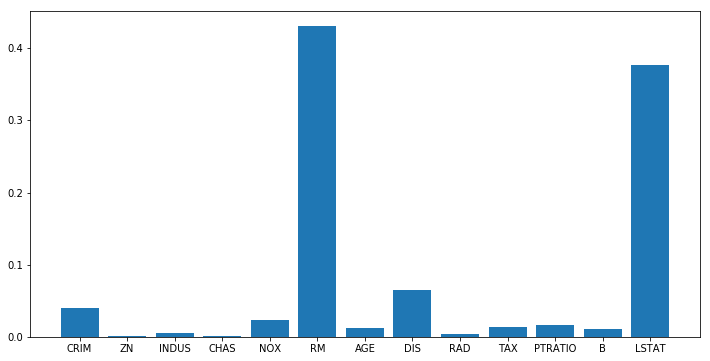

In [83]:
%pylab inline
import numpy as np
from sklearn.ensemble import RandomForestRegressor

from sklearn.datasets import load_boston
data = load_boston()

rf = RandomForestRegressor()
rf.fit(data.data, data.target);
print(rf.feature_importances_)

plt.figure(figsize=(12, 6))
plt.bar(range(1, 14), rf.feature_importances_)
_ = plt.xticks(range(1, 14), data.feature_names)

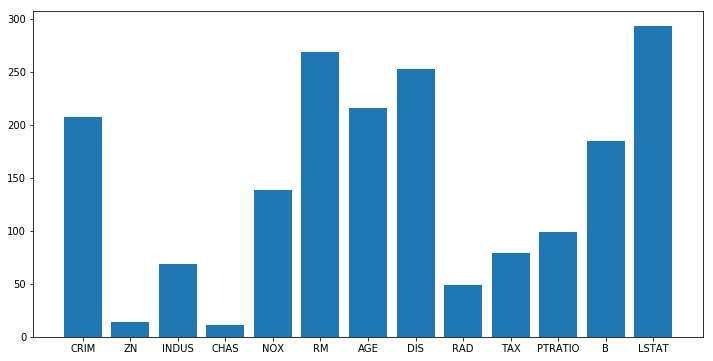

In [84]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor

from lightgbm import LGBMRegressor
data = load_boston()

clf = LGBMRegressor()
clf.fit(data.data, data.target)

plt.figure(figsize=(12, 6))
plt.bar(range(1, 14), clf.feature_importances_)
_ = plt.xticks(range(1, 14), data.feature_names)

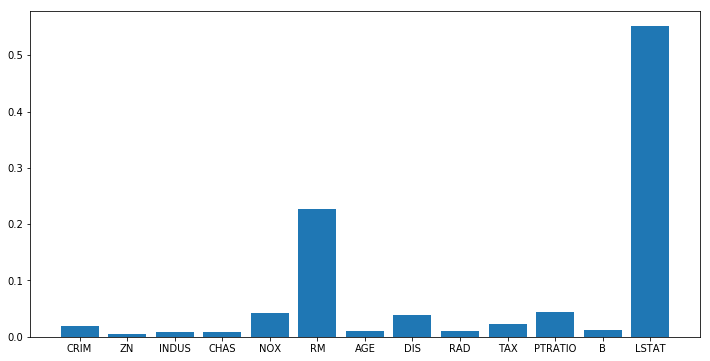

In [85]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor

from xgboost import XGBRegressor
data = load_boston()

clf = XGBRegressor()
clf.fit(data.data, data.target)

plt.figure(figsize=(12, 6))
plt.bar(range(1, 14), clf.feature_importances_)
_ = plt.xticks(range(1, 14), data.feature_names)

# Two-Simg代码

In [86]:
import os
import sys
import operator
import numpy as np
import pandas as pd
from scipy import sparse
import random
import xgboost as xgb
from sklearn import model_selection, preprocessing, ensemble
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from collections import defaultdict, Counter

In [115]:
def runXGB(train_X, train_y, val_X, val_y=None, test_X=None, feature_names=None, seed_val=0, num_rounds=1000):
    param = {}
    param['objective'] = 'multi:softprob'
    param['eta'] = 0.03
    param['max_depth'] = 6
    param['silent'] = 0
    param['num_class'] = 3
    param['eval_metric'] = "mlogloss"
    param['min_child_weight'] = 1
    param['subsample'] = 0.7
    param['colsample_bytree'] = 0.7
    param['seed'] = seed_val
    param['nthread'] = 12
    num_rounds = num_rounds

    plst = list(param.items())
    xgtrain = xgb.DMatrix(train_X, label=train_y)

    if val_y is not None:
        xgval = xgb.DMatrix(val_X, label=val_y)
        watchlist = [ (xgtrain,'train'), (xgval, 'val') ]
        model = xgb.train(plst, xgtrain, num_rounds, watchlist, early_stopping_rounds=50)
    else:
        model = xgb.train(plst, xgtrain, num_rounds)
    xgtest = xgb.DMatrix(test_X)
    
    pred_test_y = model.predict(xgtest)
    return pred_test_y, model

In [89]:
train_df = pd.read_json('../input/train.json.zip', compression='zip')
test_df = pd.read_json('../input/test.json.zip', compression='zip')

features_to_use  = ["bathrooms", "bedrooms", "latitude", "longitude", "price"]

mean_price = int(train_df['price'].mean())
test_df.loc[test_df['price']<200,'price'] = mean_price
train_df.loc[train_df['price']<200,'price'] = mean_price

In [90]:
train_test = pd.concat([train_df, test_df], 0,sort=False)

features = train_test[["features"]].apply(
    lambda _: [list(map(str.strip, map(str.lower, x))) for x in _])


n = 5

feature_counts = Counter()
for feature in features.features:
    feature_counts.update(feature)
feature = sorted([k for (k,v) in feature_counts.items() if v > n])
feature[:10]


def clean(s):
    x = s.replace("-", "")
    x = x.replace(" ", "")
    x = x.replace("24/7", "24")
    x = x.replace("24hr", "24")
    x = x.replace("24-hour", "24")
    x = x.replace("24hour", "24")
    x = x.replace("24 hour", "24")
    x = x.replace("common", "cm")
    x = x.replace("concierge", "doorman")
    x = x.replace("bicycle", "bike")
    x = x.replace("pets:cats", "cats")
    x = x.replace("allpetsok", "pets")
    x = x.replace("dogs", "pets")
    x = x.replace("private", "pv")
    x = x.replace("deco", "dc")
    x = x.replace("decorative", "dc")
    x = x.replace("onsite", "os")
    x = x.replace("outdoor", "od")
    x = x.replace("ss appliances", "stainless")
    return x

def feature_hash(x):
    cleaned = clean(x, uniq)
    key = cleaned[:4].strip()
    return key


key2original = defaultdict(list)
k = 4
for f in feature:
    cleaned = clean(f)
    key = cleaned[:k].strip()

    key2original[key].append(f)

    
def to_tuples():
    for f in feature:
        key = clean(f)[:k].strip()
        yield (f, key2original[key][0])
        
deduped = list(to_tuples())
df = pd.DataFrame(deduped, columns=["original_feature", "unique_feature"])

dict_rep_features = pd.Series(df['unique_feature'].values, df['original_feature'].values)

In [91]:
test_df['features'] = test_df['features'].apply(lambda x: list(map(str.strip, map(str.lower, x))))\
                    .apply(lambda x: [dict_rep_features[i] for i in x if i in dict_rep_features.index])\
                    .apply(lambda x: list(set(x)))

train_df['features'] = train_df['features'].apply(lambda x: list(map(str.strip, map(str.lower, x))))\
                    .apply(lambda x: [dict_rep_features[i] for i in x if i in dict_rep_features.index])\
                    .apply(lambda x: list(set(x)))


In [92]:
import math
def cart2rho(x, y):
    rho = np.sqrt(x**2 + y**2)
    return rho


def cart2phi(x, y):
    phi = np.arctan2(y, x)
    return phi


def rotation_x(row, alpha):
    x = row['latitude']
    y = row['longitude']
    return x*math.cos(alpha) + y*math.sin(alpha)


def rotation_y(row, alpha):
    x = row['latitude']
    y = row['longitude']
    return y*math.cos(alpha) - x*math.sin(alpha)


def add_rotation(degrees, df):
    namex = "rot" + str(degrees) + "_X"
    namey = "rot" + str(degrees) + "_Y"

    df['num_' + namex] = df.apply(lambda row: rotation_x(row, math.pi/(180/degrees)), axis=1)
    df['num_' + namey] = df.apply(lambda row: rotation_y(row, math.pi/(180/degrees)), axis=1)

    return df

def operate_on_coordinates(tr_df, te_df):
    for df in [tr_df, te_df]:
        #polar coordinates system
        df["num_rho"] = df.apply(lambda x: cart2rho(x["latitude"] - 40.78222222, x["longitude"]+73.96527777), axis=1)
        df["num_phi"] = df.apply(lambda x: cart2phi(x["latitude"] - 40.78222222, x["longitude"]+73.96527777), axis=1)
        #rotations
        for angle in [15,30,45,60]:
            df = add_rotation(angle, df)

    return tr_df, te_df

train_df, test_df = operate_on_coordinates(train_df, test_df)

features_to_use.extend(['num_rho', 'num_phi', 'num_rot15_X', 'num_rot15_Y', 'num_rot30_X',
       'num_rot30_Y', 'num_rot45_X', 'num_rot45_Y', 'num_rot60_X',
       'num_rot60_Y'])

In [93]:
import re

def cap_share(x):
    return sum(1 for c in x if c.isupper())/float(len(x)+1)

for df in [train_df, test_df]:
    # do you think that users might feel annoyed BY A DESCRIPTION THAT IS SHOUTING AT THEM?
    df['num_cap_share'] = df['description'].apply(cap_share)
    
    # how long in lines the desc is?
    df['num_nr_of_lines'] = df['description'].apply(lambda x: x.count('<br /><br />'))
   
    # is the description redacted by the website?        
    df['num_redacted'] = 0
    df['num_redacted'].ix[df['description'].str.contains('website_redacted')] = 1

    
    # can we contact someone via e-mail to ask for the details?
    df['num_email'] = 0
    df['num_email'].ix[df['description'].str.contains('@')] = 1
    
    #and... can we call them?
    
    reg = re.compile(".*?(\(?\d{3}\D{0,3}\d{3}\D{0,3}\d{4}).*?", re.S)
    def try_and_find_nr(description):
        if reg.match(description) is None:
            return 0
        return 1

    df['num_phone_nr'] = df['description'].apply(try_and_find_nr)

    


features_to_use.extend(['num_cap_share', 'num_nr_of_lines', 'num_redacted',
       'num_email', 'num_phone_nr'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.

In [94]:
# count of photos #
train_df["num_photos"] = train_df["photos"].apply(len)
test_df["num_photos"] = test_df["photos"].apply(len)

# count of "features" #
train_df["num_features"] = train_df["features"].apply(len)
test_df["num_features"] = test_df["features"].apply(len)

# count of words present in description column #
train_df["num_description_words"] = train_df["description"].apply(lambda x: len(x.split(" ")))
test_df["num_description_words"] = test_df["description"].apply(lambda x: len(x.split(" ")))

# convert the created column to datetime object so as to extract more features 
train_df["created"] = pd.to_datetime(train_df["created"])
test_df["created"] = pd.to_datetime(test_df["created"])

# Let us extract some features like year, month, day, hour from date columns #
train_df["created_year"] = train_df["created"].dt.year
test_df["created_year"] = test_df["created"].dt.year
train_df["created_month"] = train_df["created"].dt.month
test_df["created_month"] = test_df["created"].dt.month
train_df["created_day"] = train_df["created"].dt.day
test_df["created_day"] = test_df["created"].dt.day
train_df["created_hour"] = train_df["created"].dt.hour
test_df["created_hour"] = test_df["created"].dt.hour

# adding all these new features to use list #
features_to_use.extend(["num_photos", "num_features", "num_description_words","created_year", "created_month", "created_day", "listing_id", "created_hour"])

train_df["price_t"] =train_df["price"]/train_df["bedrooms"]
test_df["price_t"] = test_df["price"]/test_df["bedrooms"] 

train_df["room_sum"] = train_df["bedrooms"]+train_df["bathrooms"] 
test_df["room_sum"] = test_df["bedrooms"]+test_df["bathrooms"] 

features_to_use.extend(["price_t", "room_sum", "num_description_words"])

In [95]:
start_values = [0,0,0]

index=list(range(train_df.shape[0]))
random.shuffle(index)
a=[np.nan]*len(train_df)
b=[np.nan]*len(train_df)
c=[np.nan]*len(train_df)

for i in range(5):
    building_level={}
    for j in train_df['manager_id'].values:
        building_level[j]= start_values.copy()
    test_index=index[int((i*train_df.shape[0])/5):int(((i+1)*train_df.shape[0])/5)]
    train_index=list(set(index).difference(test_index))
    for j in train_index:
        temp=train_df.iloc[j]
        if temp['interest_level']=='low':
            building_level[temp['manager_id']][0]+=1
        if temp['interest_level']=='medium':
            building_level[temp['manager_id']][1]+=1
        if temp['interest_level']=='high':
            building_level[temp['manager_id']][2]+=1
    for j in test_index:
        temp=train_df.iloc[j]
        if sum(building_level[temp['manager_id']])!=0:
            a[j]=building_level[temp['manager_id']][0]*1.0/sum(building_level[temp['manager_id']])
            b[j]=building_level[temp['manager_id']][1]*1.0/sum(building_level[temp['manager_id']])
            c[j]=building_level[temp['manager_id']][2]*1.0/sum(building_level[temp['manager_id']])
train_df['manager_level_low']=a
train_df['manager_level_medium']=b
train_df['manager_level_high']=c


a=[]
b=[]
c=[]
building_level={}
for j in train_df['manager_id'].values:
    building_level[j]= start_values.copy()
for j in range(train_df.shape[0]):
    temp=train_df.iloc[j]
    if temp['interest_level']=='low':
        building_level[temp['manager_id']][0]+=1
    if temp['interest_level']=='medium':
        building_level[temp['manager_id']][1]+=1
    if temp['interest_level']=='high':
        building_level[temp['manager_id']][2]+=1

for i in test_df['manager_id'].values:
    if i not in building_level.keys():
        a.append(np.nan)
        b.append(np.nan)
        c.append(np.nan)
    else:
        a.append(building_level[i][0]*1.0/sum(building_level[i]))
        b.append(building_level[i][1]*1.0/sum(building_level[i]))
        c.append(building_level[i][2]*1.0/sum(building_level[i]))
test_df['manager_level_low']=a
test_df['manager_level_medium']=b
test_df['manager_level_high']=c

features_to_use.append('manager_level_low') 
features_to_use.append('manager_level_medium') 
features_to_use.append('manager_level_high')

In [96]:
train_df["listing_id1"] = train_df["listing_id"] - 68119576.0
test_df["listing_id1"] =  test_df["listing_id"] - 68119576.0

train_df["num_price_by_furniture"] = (train_df["price"])/ (train_df["bathrooms"] + train_df["bedrooms"] + 1.0)
test_df["num_price_by_furniture"] =  (test_df["price"])/ (test_df["bathrooms"] + test_df["bedrooms"] +  1.0)

train_df["price_latitue"] = (train_df["price"])/ (train_df["latitude"]+1.0)
test_df["price_latitue"] =  (test_df["price"])/ (test_df["latitude"]+1.0)

train_df["price_longtitude"] = (train_df["price"])/ (train_df["longitude"]-1.0)
test_df["price_longtitude"] =  (test_df["price"])/ (test_df["longitude"]-1.0)  

train_df["num_furniture"] =  train_df["bathrooms"] + train_df["bedrooms"] 
test_df["num_furniture"] =   test_df["bathrooms"] + test_df["bedrooms"] 

train_df["total_days"] =   (train_df["created_month"] -4.0)*30 + train_df["created_day"] +  train_df["created_hour"] /25.0
test_df["total_days"] =(test_df["created_month"] -4.0)*30 + test_df["created_day"] +  test_df["created_hour"] /25.0        
train_df["diff_rank"]= train_df["total_days"]/train_df["listing_id1"]
test_df["diff_rank"]= test_df["total_days"]/test_df["listing_id1"]


features_to_use.extend([ "total_days","diff_rank",
"num_price_by_furniture","price_latitue","price_longtitude",'num_furniture'])

In [97]:
categorical = ["display_address", "manager_id", "building_id", "street_address"]
for f in categorical:
        if train_df[f].dtype=='object':
            #print(f)
            lbl = preprocessing.LabelEncoder()
            lbl.fit(list(train_df[f].values) + list(test_df[f].values))
            train_df[f] = lbl.transform(list(train_df[f].values))
            test_df[f] = lbl.transform(list(test_df[f].values))
            features_to_use.append(f)

In [98]:
train_df["price0"] = (train_df["price"]%10==0).astype(int)
test_df["price0"] = (test_df["price"]%10==0).astype(int)

train_df["manager_count"] = train_df["manager_id"].replace(train_df["manager_id"].value_counts())
test_df["manager_count"] = test_df["manager_id"].replace(train_df["manager_id"].value_counts())

features_to_use.extend(["price0",'manager_count'])

train_df['features'] = train_df["features"].apply(lambda x: " ".join(["_".join(i.split(" ")) for i in x]))
test_df['features'] = test_df["features"].apply(lambda x: " ".join(["_".join(i.split(" ")) for i in x]))
print(train_df["features"].head())
tfidf = CountVectorizer(stop_words='english', max_features=70)
te_sparse = tfidf.fit_transform(test_df["features"])
tr_sparse = tfidf.transform(train_df["features"])

tfidfdesc=TfidfVectorizer(min_df=20, max_features=50, strip_accents='unicode',lowercase =True,
                    analyzer='word', token_pattern=r'\w{16,}', ngram_range=(1, 2), use_idf=False,smooth_idf=False, 
                    sublinear_tf=True, stop_words = 'english')  

train_df['description'] =  train_df['description'].apply(lambda x: str(x).encode('utf-8') if len(x)>2 else "nulldesc") 
test_df['description'] =   test_df['description'].apply(lambda x: str(x).encode('utf-8') if len(x)>2 else "nulldesc") 
te_sparsed = tfidfdesc. fit_transform (test_df["description"])  
tr_sparsed = tfidfdesc.transform(train_df["description"])

train_X = sparse.hstack([train_df[features_to_use], tr_sparse,tr_sparsed]).tocsr()#
test_X = sparse.hstack([test_df[features_to_use], te_sparse,te_sparsed]).tocsr()#

target_num_map = {'high':0, 'medium':1, 'low':2}
train_y = np.array(train_df['interest_level'].apply(lambda x: target_num_map[x]))

print(train_X.shape, test_X.shape)

10                                                         
10000     elevator concierge fitness_center cats_allowed...
100004                         dish_washer hardwood laundry
100007                                      hardwood no_fee
100013                                              pre_war
Name: features, dtype: object
(49352, 166) (74659, 166)


In [120]:
preds, model = runXGB(train_X, train_y, val_X=None, val_y=None, test_X=test_X, num_rounds=100)
out_df = pd.DataFrame(preds)
out_df.columns = ["high", "medium", "low"]
out_df["listing_id"] = test_df.listing_id.values
out_df.to_csv("xgb_baseline3.csv", index=False)

In [122]:
cv_scores = []
test_pred = None
kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=2016)
for dev_index, val_index in kf.split(range(train_X.shape[0])):
        dev_X, val_X = train_X[dev_index,:], train_X[val_index,:]
        dev_y, val_y = train_y[dev_index], train_y[val_index]
        preds, model = runXGB(dev_X, dev_y, val_X, val_y, test_X, num_rounds=2000)
        
        if test_pred is None:
            test_pred = preds
        else:
            test_pred += preds
test_pred /= 5
out_df = pd.DataFrame(test_pred)
out_df.columns = ["high", "medium", "low"]
out_df["listing_id"] = test_df.listing_id.values
out_df.to_csv("xgb_baseline3.csv", index=False)

[0]	train-mlogloss:1.07775	val-mlogloss:1.07827
Multiple eval metrics have been passed: 'val-mlogloss' will be used for early stopping.

Will train until val-mlogloss hasn't improved in 50 rounds.
[1]	train-mlogloss:1.05804	val-mlogloss:1.05915
[2]	train-mlogloss:1.0391	val-mlogloss:1.04076
[3]	train-mlogloss:1.02106	val-mlogloss:1.02331
[4]	train-mlogloss:1.00379	val-mlogloss:1.00659
[5]	train-mlogloss:0.987297	val-mlogloss:0.990692
[6]	train-mlogloss:0.971684	val-mlogloss:0.975621
[7]	train-mlogloss:0.956643	val-mlogloss:0.961212
[8]	train-mlogloss:0.942392	val-mlogloss:0.947541
[9]	train-mlogloss:0.928634	val-mlogloss:0.934332
[10]	train-mlogloss:0.915499	val-mlogloss:0.921662
[11]	train-mlogloss:0.902885	val-mlogloss:0.909531
[12]	train-mlogloss:0.890587	val-mlogloss:0.897704
[13]	train-mlogloss:0.879018	val-mlogloss:0.886706
[14]	train-mlogloss:0.867827	val-mlogloss:0.876054
[15]	train-mlogloss:0.857247	val-mlogloss:0.865963
[16]	train-mlogloss:0.847002	val-mlogloss:0.856158
[17]	

In [123]:
test_pred /= 5
out_df = pd.DataFrame(test_pred)
out_df.columns = ["high", "medium", "low"]
out_df["listing_id"] = test_df.listing_id.values
out_df.to_csv("xgb_baseline3.csv", index=False)